# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with simply "mnist" and everything should work fine.

In [0]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

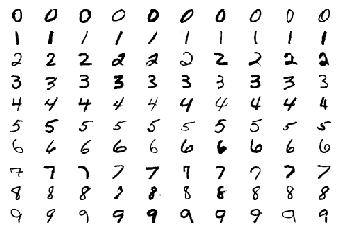

In [3]:
#def P1(num_examples=10):

### STUDENT START ###
 
#print(train_data[0])

def P1(num_examples):
  
  fig = plt.figure() #initializing plot

  count = 1 #count starts at one. Will iterate through to 99 in order add to next position in subplot

  #Inner loop will loop through 0-9, and add n-th index'd where 0-9 shows 
  for i in range(num_examples): #find i-th indexed number in test_labels
    for j in range(10): #create a new row 0-9 with j-th indexed item
      #print(i)
      im_idx = np.argwhere(train_labels == str(i))[j] #locate position in test_labels where number j exists, look for i-th position where number exists 
      #print(im_idx)
      plottable_image = np.reshape(train_data[im_idx], (28, 28)) #reshape number
      ax = fig.add_subplot(num_examples, 10, count) #add to 10*num_example matrix
      ax.set_axis_off() #turn axis off
      count = count + 1 #add 1 to the count
      ax.imshow(plottable_image, cmap='gray_r') #imshow for number in question
  
P1(10)

### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
#def P2(k_values):

### STUDENT START ###


def P2(k_values):
  
  accuracies = []
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) #set K
    knn.fit(mini_train_data, mini_train_labels) #train on mini train/mini train labels

    pred = knn.predict(dev_data) #predict on dev data

    accuracy_count = 0

    for j in range(pred.shape[0]):
      if pred[j] == dev_labels[j]: #if label is correct, add 1
        accuracy_count += 1
      else:
        continue
    
    #print(confusion_matrix(dev_labels, pred))
    
    accuracies.append(accuracy_count/pred.shape[0]) #calculate accuracies
    
    #print classification report for k=1
    if k==1:
      print("Classification report for k=1")
      print(classification_report(dev_labels, pred)) #evaluate performance
    else:
      pass
    
    

  for i, v in enumerate(k_values):
    print("k_value: " +  str(k_values[i]) + ", Accuracy: " + str(accuracies[i]))


### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification report for k=1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k_value: 1, Accuracy: 0.884
k_value: 3, Accuracy: 0.876
k_value: 5, Accuracy: 0.882
k_value: 7, Accuracy: 0.877
k_value: 9, Accuracy: 0.875


ANSWER: Based on the F1 score, the most difficult performing digit appears to be 8 (F1 score of .80.)

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###

  train_time = [] #initialize list of training times
  
  for i in train_sizes:
    sliced_train = train_data[:i] #slice array based off of training size
    sliced_label = train_labels[:i] #slice array based off of training size
    #print(sliced_train.shape)
    knn = KNeighborsClassifier(n_neighbors=1)

    knn.fit(sliced_train, sliced_label) #train on sliced train/sliced train labels
 
    start_time = time.time() #start time
    #print(start_time)

    pred = knn.predict(dev_data) #predict on dev data

    end_time = time.time() #end time once prediction is done
    #print(end_time)
    
    difference = end_time - start_time #take difference of times
    train_time.append(difference) #append to list

    #calculate accuracy
    
    accuracy_count = 0

    for j in range(pred.shape[0]):
      if pred[j] == dev_labels[j]: #if predicted label matches dev label, add to accuracy count
        accuracy_count += 1
      else:
        continue
    
    accuracies.append(accuracy_count/pred.shape[0]) #calculate accuracies
  
  #Print accuracy and train time for each training size
  for i, v in enumerate(train_sizes):
    print("Train Size: " +  str(train_sizes[i]) + ", Accuracy: " + str(accuracies[i]) + ", Train Time (seconds): " + str(train_time[i]) )
  
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)


### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

Train Size: 100, Accuracy: 0.702, Train Time (seconds): 0.173142671585083
Train Size: 200, Accuracy: 0.791, Train Time (seconds): 0.32599306106567383
Train Size: 400, Accuracy: 0.811, Train Time (seconds): 0.6268539428710938
Train Size: 800, Accuracy: 0.866, Train Time (seconds): 1.2614679336547852
Train Size: 1600, Accuracy: 0.905, Train Time (seconds): 2.4915614128112793
Train Size: 3200, Accuracy: 0.927, Train Time (seconds): 5.477350234985352
Train Size: 6400, Accuracy: 0.939, Train Time (seconds): 11.090161561965942
Train Size: 12800, Accuracy: 0.952, Train Time (seconds): 22.384172916412354
Train Size: 25000, Accuracy: 0.962, Train Time (seconds): 43.64607620239258


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

R^2 for Linear Regression Model: 0.420268152171413
Predicted accuracy with linear regression: 1.2446923405015076
R^2 for Log-Linear Regression Model: 0.39104461174740496
Predicted accuracy with log linear regression: 1.3356261682403168
R^2 for Log-Log Regression Model: 0.8824770795571613
Predicted accuracy with log log regression: 1.050787067812282
R^2 for sqrt Regression Model: 0.6350826684268424
Predicted accuracy with sqrt regression: 1.1332643152835564


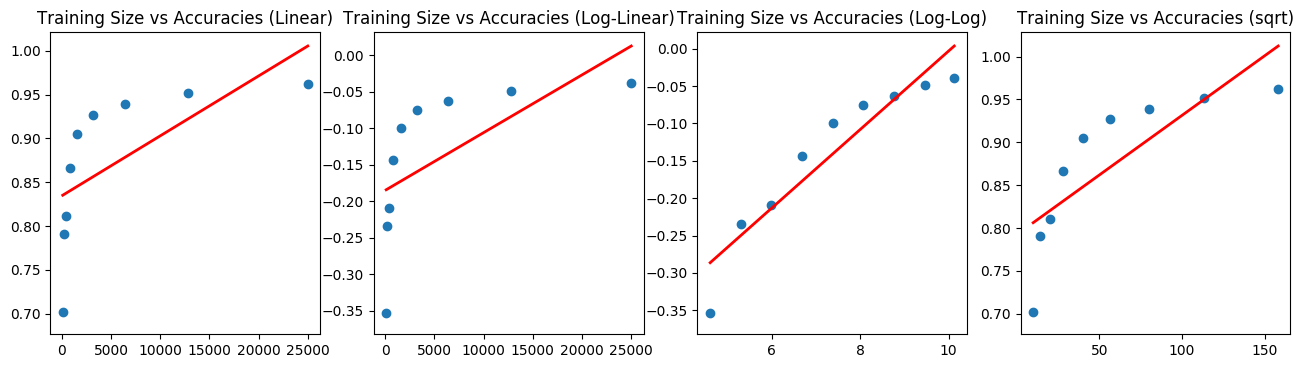

In [6]:
def P4():
    
### STUDENT START ###

    fig_p4 = plt.figure(figsize=(16, 4), dpi=100 ) #Setting plot size
  
    ####Straight Linear Regression####

    X = np.array(train_sizes).reshape(-1, 1) #reshape train size so that it can be read into LinearRegression()
    Y = np.array(accuracies).reshape(-1, 1) #reshape accuracies so that it can be read into LinearRegression()
    
    reg = LinearRegression() #initalize regression
    
    reg.fit(X,Y) #fit x & y
    
    ax = fig_p4.add_subplot(1, 4, 1) #plot in first square
    plt.scatter(train_sizes, accuracies)
    plt.title("Training Size vs Accuracies (Linear)")
    plt.plot(X, reg.predict(X), color = 'red', linewidth=2) #plot regression line
    #print(reg)
    
    print("R^2 for Linear Regression Model: " + str(reg.score(X,Y)))
    
    
    #linear regression predicted accuracy @ n=60000
    lin_reg_predict = reg.predict(np.array([[60000]]))
    
    print("Predicted accuracy with linear regression: " + str(lin_reg_predict[0][0]))
    
    ####Log transform Y variable, for log linear####
    Y_log = np.log(np.array(accuracies)).reshape(-1, 1)
    
    reg2 = LinearRegression()
    
    reg2.fit(X,Y_log)
    
    ax = fig_p4.add_subplot(1, 4, 2)
    plt.scatter(X, Y_log)
    plt.title("Training Size vs Accuracies (Log-Linear)")
    plt.plot(X, reg2.predict(X), color = 'red', linewidth=2)
    #print(reg)
    
    print("R^2 for Log-Linear Regression Model: " + str(reg2.score(X,Y_log)))
    
    
    #log linear regression predicted accuracy @ n=60000
    log_linear_predict = np.exp(reg2.predict(np.array([[60000]])))
    
    print("Predicted accuracy with log linear regression: " + str(log_linear_predict[0][0])) 
  
    ####Log-log####
    
    X_log = np.log(np.array(train_sizes)).reshape(-1, 1)
    
    reg3 = LinearRegression()
    
    reg3.fit(X_log,Y_log)
    
    ax = fig_p4.add_subplot(1, 4, 3)
    plt.scatter(X_log, Y_log)
    plt.title("Training Size vs Accuracies (Log-Log)")
    plt.plot(X_log, reg3.predict(X_log), color = 'red', linewidth=2)
    
    #print(reg)
    
    print("R^2 for Log-Log Regression Model: " + str(reg3.score(X_log,Y_log)))
    
    #log log linear regression predicted accuracy @ n=60000
    log_log_predict = np.exp(reg3.predict(np.log(np.array([[60000]]))))
    
    print("Predicted accuracy with log log regression: " + str(log_log_predict[0][0]))
    
    
    ####sqrt####
    
    X_sqrt = np.sqrt(np.array(train_sizes)).reshape(-1, 1)
    
    reg4 = LinearRegression()
    
    reg4.fit(X_sqrt,Y)
    
    ax = fig_p4.add_subplot(1, 4, 4)
    plt.scatter(X_sqrt, Y)
    plt.title("Training Size vs Accuracies (sqrt)")
    plt.plot(X_sqrt, reg4.predict(X_sqrt), color = 'red', linewidth=2)
    
    #print(reg)
    
    print("R^2 for sqrt Regression Model: " + str(reg4.score(X_sqrt,Y)))
    
    

    #Sqrt linear regression predicted accuracy @ n=60000
    sqrt_predict = reg4.predict(np.sqrt(np.array([[60000]])))
    
    print("Predicted accuracy with sqrt regression: " + str(sqrt_predict[0][0]))
    
    
### STUDENT END ###

P4()

ANSWER: The issue with using linear regression here is that the relationship between accuracy and training size is not linear. Doubling the training size will result in smaller and smaller improvements to accuracy. Using the linear regression model, setting X=60000 will yield a predicted accuracy of 1.244, which does not make sense, since you cannot have a predicted accuracy greater than 100%.

Applying a log-log transformation to the Y and X variables appears to yield the best R^2 score (.42 vs .88). The predicted accuracy is still over 1, however our predicted Y is much closer to 1 than the other 3 types of models.



(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix for training size of 5000
[[103   0   0   0   0   1   1   0   1   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  1   0  96   2   1   0   0   4   2   0]
 [  0   1   1  88   0   3   0   2   2   0]
 [  0   0   0   0  85   0   0   0   0   7]
 [  1   0   0   2   0  78   5   0   1   1]
 [  0   2   0   0   0   1  99   0   0   0]
 [  0   0   2   0   0   0   0  97   0   3]
 [  1   4   2   4   1   2   1   1  78   0]
 [  1   0   0   0   6   0   0   1   0  87]]
F1 score for 0: 0.9671361502347416
F1 score for 1: 0.9711934156378601
F1 score for 2: 0.927536231884058
F1 score for 3: 0.9119170984455958
F1 score for 4: 0.918918918918919
F1 score for 5: 0.9017341040462428
F1 score for 6: 0.951923076923077
F1 score for 7: 0.9371980676328502
F1 score for 8: 0.8764044943820225
F1 score for 9: 0.9015544041450776


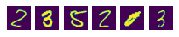

In [7]:
#def P5():

### STUDENT START ###

def P5(train_size):
  
  train_time = []
  sliced_train = train_data[:train_size]
  sliced_label = train_labels[:train_size]
  #print(sliced_train.shape)
  
  #run KNN with nearest neighbor of 1
  knn = KNeighborsClassifier(n_neighbors=1)

  knn.fit(sliced_train, sliced_label) #train on mini train/mini train labels

  pred = knn.predict(dev_data) #predict on dev data
  
  #calculate knn
  
  accuracy_count = 0

  for j in range(pred.shape[0]):
    if pred[j] == dev_labels[j]:
      accuracy_count += 1
    else:
      continue

  accuracies.append(accuracy_count/pred.shape[0])

  conf_matrix = confusion_matrix(dev_labels, pred)
  
  print("Confusion Matrix for training size of 5000")
  print(conf_matrix)
  
  
  ####Calculate F1 scores for all digits. For the digit with the lowest F1 score, output all mistakes
  
  #0
  
  #return true value
  true_0 = conf_matrix[0][0]
  
  #print(dev_labels)
  
  #calculate precision ratio
  precision_count = 0
  for i in dev_labels:
    if i == '0':
      precision_count += 1
  
  #calculate recall ratio
  recall_count = 0
  
  for i in pred:
    if i == '0':
      recall_count += 1
  #print(precision_count)
  #print(recall_count)
  
  precision_0 = true_0 / precision_count
  recall_0 = true_0 / recall_count
  
  #print(precision_0)
  #print(recall_0)
  
  #calculate f1 score for 0
  f1_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
  print("F1 score for 0: " + str(f1_score_0))
  
  #1
  
  true_1 = conf_matrix[1][1]
  
  #print(dev_labels)
  precision_count = 0
  for i in dev_labels:
    if i == '1':
      precision_count += 1
  
  recall_count = 0
  
  for i in pred:
    if i == '1':
      recall_count += 1
  #print(precision_count)
  #print(recall_count)
  
  precision_1 = true_1 / precision_count
  recall_1 = true_1 / recall_count
  
  #print(precision_1)
  #print(recall_1)
  
  f1_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
  print("F1 score for 1: " + str(f1_score_1))
  
  
  #2
  
  true_2 = conf_matrix[2][2]

  precision_count = 0
  for i in dev_labels:
    if i == '2':
      precision_count += 1
  
  recall_count = 0  
  for i in pred:
    if i == '2':
      recall_count += 1
  
  precision_2 = true_2 / precision_count
  recall_2 = true_2 / recall_count
  
  f1_score_2 = 2 * (precision_2 * recall_2) / (precision_2 + recall_2)
  print("F1 score for 2: " + str(f1_score_2))
  
  
  #3
  true_3 = conf_matrix[3][3]

  precision_count = 0
  for i in dev_labels:
    if i == '3':
      precision_count += 1
  
  recall_count = 0  
  for i in pred:
    if i == '3':
      recall_count += 1
  
  precision_3 = true_3 / precision_count
  recall_3 = true_3 / recall_count
  
  f1_score_3 = 2 * (precision_3 * recall_3) / (precision_3 + recall_3)
  print("F1 score for 3: " + str(f1_score_3))
  
  #4
  true_4 = conf_matrix[4][4]

  precision_count = 0
  for i in dev_labels:
    if i == '4':
      precision_count += 1
  
  recall_count = 0  
  for i in pred:
    if i == '4':
      recall_count += 1
  
  precision_4 = true_4 / precision_count
  recall_4 = true_4 / recall_count
  
  f1_score_4 = 2 * (precision_4 * recall_4) / (precision_4 + recall_4)
  print("F1 score for 4: " + str(f1_score_4))
  
  #5
  true_5 = conf_matrix[5][5]

  precision_count = 0
  for i in dev_labels:
    if i == '5':
      precision_count += 1
  
  recall_count = 0  
  for i in pred:
    if i == '5':
      recall_count += 1
  
  precision_5 = true_5 / precision_count
  recall_5 = true_5 / recall_count
  
  f1_score_5 = 2 * (precision_5 * recall_5) / (precision_5 + recall_5)
  print("F1 score for 5: " + str(f1_score_5))
    
  #6
  true_6 = conf_matrix[6][6]

  precision_count = 0
  for i in dev_labels:
    if i == '6':
      precision_count += 1
  
  recall_count = 0  
  for i in pred:
    if i == '6':
      recall_count += 1
  
  precision_6 = true_6 / precision_count
  recall_6 = true_6 / recall_count
  
  f1_score_6 = 2 * (precision_6 * recall_6) / (precision_6 + recall_6)
  print("F1 score for 6: " + str(f1_score_6))
  
  #7
  true_7 = conf_matrix[7][7]

  precision_count = 0
  for i in dev_labels:
    if i == '7':
      precision_count += 1
  
  recall_count = 0  
  for i in pred:
    if i == '7':
      recall_count += 1
  
  precision_7 = true_7 / precision_count
  recall_7 = true_7 / recall_count
  
  f1_score_7 = 2 * (precision_7 * recall_7) / (precision_7 + recall_7)
  print("F1 score for 7: " + str(f1_score_7))
  

  #8
  true_8 = conf_matrix[8][8]

  precision_count = 0
  for i in dev_labels:
    if i == '8':
      precision_count += 1
  
  recall_count = 0  
  for i in pred:
    if i == '8':
      recall_count += 1
  
  precision_8 = true_8 / precision_count
  recall_8 = true_8 / recall_count
  
  f1_score_8 = 2 * (precision_8 * recall_8) / (precision_8 + recall_8)
  print("F1 score for 8: " + str(f1_score_8))
  
  #9  
  true_9 = conf_matrix[9][9]

  precision_count = 0
  for i in dev_labels:
    if i == '9':
      precision_count += 1
  
  recall_count = 0  
  for i in pred:
    if i == '9':
      recall_count += 1
  
  precision_9 = true_9 / precision_count
  recall_9 = true_9 / recall_count
  
  f1_score_9 = 2 * (precision_9 * recall_9) / (precision_9 + recall_9)
  print("F1 score for 9: " + str(f1_score_9))

  ###Based on the F1 score output, it appears that 8 has the worst performance. Let's output a few examples of where 8 is confused.###
  
  fig = plt.figure() #initializing plot
  chart_plot_cnt = 1
  for i, v in enumerate(pred):
    if v == '8' and pred[i] != dev_labels[i]: #our predicted value must be 8, and the value must differ from the digit in dev_labels
      ax = fig.add_subplot(1, 12, chart_plot_cnt) #add to 1x10 grid
      chart_plot_cnt = chart_plot_cnt + 1
      ax.set_axis_off() #turn axis off
      ax.imshow(np.reshape(dev_data[i],(28,28)))
      
   
  
P5(5000)

### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Accuracy preprocessing with training, but not dev data: 0.903
Accuracy preprocessing with dev, but not training data: 0.867
Accuracy preprocessing both training and dev data: 0.901
KNN accuracy with no preprocessing: 0.884


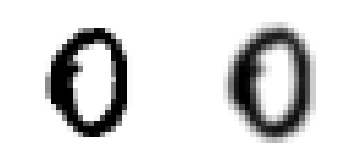

In [8]:
#works on all images

def P6(): 
  
  #### Blurring function####
  def blurring_function(image_array): #pass in 784 length matrix
    cv_matrix = np.array([[.0625, .125, .0625], [.125, .25, .125] , [.0625 , .125, .0625] ]) #convolution matrix
    #cv_matrix = gkern2(3, 1)
    plottable_image = np.reshape(image_array, (28, 28)) #reshape to 28x28 matrix
    d = np.zeros((28,28)) #new array to write to

    rows = plottable_image.shape[0] #return number of rows of plottable image
    cols = plottable_image.shape[1] #return number of columns of plottable image

    #get surrounding pixels for each pixel in mnist image. 
    #if it is outside of boundaries of our matrix, return 0
    def get_surrounding_pixels(x,y,i):
      if x-1 >= 0 and y-1 >= 0:
        upper_left = i[x-1,y-1]
      else:
        upper_left = 0

      if y-1 >= 0:
        upper_mid = i[x,y-1]
      else:
        upper_mid = 0

      if x-1 >= 0 and y+1 < 28:
        upper_right = i[x-1, y+1]
      else:
        upper_right  = 0

      if x-1 >= 0:
        mid_left = i[x-1,y]
      else:
        mid_left = 0

      mid = i[x,y]

      if x+1 < 28:
        mid_right = i[x+1,y]
      else:
        mid_right = 0

      if x - 1 >= 0 and y+1 < 28: 
        bottom_left = i[x-1,y+1]
      else:
        bottom_left = 0

      if y+1 < 28:
        bottom_mid = i[x,y+1]
      else:
        bottom_mid = 0

      if x+1 < 28 and y+1 < 28:
        bottom_right = i[x+1,y+1]
      else:
        bottom_right = 0

      pixel_array = np.array([[upper_left, upper_mid, upper_right], [mid_left, mid, mid_right] , [bottom_left, bottom_mid, bottom_right] ])
      #print(x,y)
      #print(pixel_array)
      return pixel_array


    #determine new pixel value based on weights of our convolution matrix
    #and set position on new matrix
    def setBlurredPixel(pixel_array,convolution_matrix):
      new_blurred_value = (pixel_array[0,0] * convolution_matrix[0,0] 
                           + pixel_array[1,0]  * convolution_matrix[1,0] 
                           + pixel_array[2,0]  * convolution_matrix[2,0] 
                           + pixel_array[0,1]  * convolution_matrix[0,1] 
                           + pixel_array[1,1]  * convolution_matrix[1,1]   
                           + pixel_array[2,1] * convolution_matrix[2,1]    
                           + pixel_array[0,2] * convolution_matrix[0,2] 
                           + pixel_array[1,2] * convolution_matrix[1,2]   
                           + pixel_array[2,2] * convolution_matrix[2,2]    
                          ) 
      return new_blurred_value
    
    #take our blurred pixel value and write it to the right position in our new array
    def setNewValue(newPixelValue,newArray,x,y):
      newArray[x,y] = newPixelValue

    #print(plottable_image)

    #Loop through each pixel in the array and set blurred value to matrix d
    for x in range(0, rows):
      for y in range(0, cols):
        setNewValue(setBlurredPixel(get_surrounding_pixels(x,y,plottable_image),cv_matrix), d, x, y)

    blurred_output = np.reshape(d,(1,784)) #Reshape blurred image (matrix d) back to 784 matrix

    return blurred_output #return the blurred array
  
  
  
  
  ####Test blurring function####
  
  fig = plt.figure() #initializing plot
  ax = fig.add_subplot(1, 2, 1) #add to 10x10 matrix
  ax.set_axis_off() #turn axis off
  ax.imshow(np.reshape(mini_train_data[0],(28,28)), cmap='gray_r') #imshow for number in question

  ax2 = fig.add_subplot(1, 2, 2) #add to 10x10 matrix
  ax2.set_axis_off() #turn axis off
  ax2.imshow(np.reshape(blurring_function(mini_train_data[0]),(28,28)), cmap='gray_r') #imshow for number in question
  
  
  
  ####Preprocess training data####
  mini_train_data_p6 = np.copy(mini_train_data) #will contained our blurred images
  
  for i,v in enumerate(mini_train_data_p6):
    mini_train_data_p6[i] = blurring_function(mini_train_data_p6[i])
  
  
  
  
  ####Preprocess dev data####
  dev_data_p6 = np.copy(dev_data) #will contain our blurred images
  
  for i,v in enumerate(dev_data_p6):
    dev_data_p6[i] = blurring_function(dev_data_p6[i])
  
  #print(mini_train_data_p6)
  #print(dev_data_p6)
  
  
  
  ####Part 1: preprocess training, but not dev data####
  knn_p6_pt1 = KNeighborsClassifier(n_neighbors=1)

  knn_p6_pt1.fit(mini_train_data_p6, mini_train_labels) #train on processed train data

  pred_p6_pt1  = knn_p6_pt1.predict(dev_data) #predict on dev data

  accuracy_count_p6_pt1 = 0

  for j in range(pred_p6_pt1.shape[0]):
    if pred_p6_pt1[j] == dev_labels[j]:
      accuracy_count_p6_pt1 += 1
    else:
      continue

  print("Accuracy preprocessing with training, but not dev data: " + str (accuracy_count_p6_pt1/pred_p6_pt1.shape[0]))
  
    
  ####Part 2: preprocess dev_data, but not training data####
  knn_p6_pt2 = KNeighborsClassifier(n_neighbors=1)

  knn_p6_pt2.fit(mini_train_data, mini_train_labels) #train on processed train data

  pred_p6_pt2  = knn_p6_pt2.predict(dev_data_p6) #predict on dev data

  accuracy_count_p6_pt2 = 0

  for j in range(pred_p6_pt2.shape[0]):
    if pred_p6_pt2[j] == dev_labels[j]:
      accuracy_count_p6_pt2 += 1
    else:
      continue

  print("Accuracy preprocessing with dev, but not training data: " + str (accuracy_count_p6_pt2/pred_p6_pt2.shape[0]))
  
  
  
  ####Part 3: preprocessing both training and dev data####
  knn_p6_pt3 = KNeighborsClassifier(n_neighbors=1)

  knn_p6_pt3.fit(mini_train_data_p6, mini_train_labels) #train on processed train data

  pred_p6_pt3  = knn_p6_pt3.predict(dev_data_p6) #predict on dev data

  accuracy_count_p6_pt3 = 0

  for j in range(pred_p6_pt3.shape[0]):
    if pred_p6_pt3[j] == dev_labels[j]:
      accuracy_count_p6_pt3 += 1
    else:
      continue

  print("Accuracy preprocessing both training and dev data: " + str (accuracy_count_p6_pt3/pred_p6_pt3.shape[0]))
  
  
  ####Part 4: No preprocessing####
  knn_p6_pt4 = KNeighborsClassifier(n_neighbors=1)

  knn_p6_pt4.fit(mini_train_data, mini_train_labels) #train on processed train data

  pred_p6_pt4  = knn_p6_pt4.predict(dev_data) #predict on dev data

  accuracy_count_p6_pt4 = 0

  for j in range(pred_p6_pt4.shape[0]):
    if pred_p6_pt4[j] == dev_labels[j]:
      accuracy_count_p6_pt4 += 1
    else:
      continue

  print("KNN accuracy with no preprocessing: " + str (accuracy_count_p6_pt4/pred_p6_pt4.shape[0]))

  
  
P6()

ANSWER: I applied a simple blurring filter for #6. Preprocessing the training data, but not the dev data appears to yield the worst results. The perforrmance of KNN appears to be relatively high with no preprocessing whatsoever. However, the performance of KNN does appear to be improved when 1) applying a blur to both the training and dev data and 2) applying a blur to the training, but not the dev data.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:
def P7():

### STUDENT START ###

  ## BernoulliNB 0/1

  mini_train_data_bin = np.copy(mini_train_data)

  for matrix in mini_train_data_bin:
    for index, item in enumerate(matrix):
      if item <.5:
        matrix[index] = 0
      else:
        matrix[index] = 1


  model = BernoulliNB()
  model.fit(mini_train_data_bin,mini_train_labels)
  
  pred = model.predict(dev_data)
  
  #calculate accuracy
  
  accuracy_count = 0

  for j in range(dev_labels.shape[0]):
    if pred[j] == dev_labels[j]:
      accuracy_count += 1
    else:
      continue

  Bernoulli_nb_accuracy = accuracy_count/pred.shape[0]
  print("BernoulliNB Accuracy: " + str(Bernoulli_nb_accuracy))
  
  
  ##MultinomialNB 0/1/2

  mini_train_data_bin2 = np.copy(mini_train_data)

  for matrix in mini_train_data_bin2:
    for index, item in enumerate(matrix):
      if item <.333:
        matrix[index] = 0
      elif item >= .333 and item < .666:
        matrix[index] = 1
      else:
        matrix[index] = 2


  model2 = MultinomialNB()
  model2.fit(mini_train_data_bin2,mini_train_labels)
  pred2 = model2.predict(dev_data)
  
  #calculate accuracy  
  
  accuracy_count2 = 0

  for j in range(dev_labels.shape[0]):
    if pred2[j] == dev_labels[j]:
      accuracy_count2 += 1
    else:
      continue
      
  Multinomial_nb_accuracy = accuracy_count2/pred2.shape[0]
  print("MultinomialNB Accuracy: " + str(Multinomial_nb_accuracy))
  

### STUDENT END ###

P7()

BernoulliNB Accuracy: 0.802
MultinomialNB Accuracy: 0.815


ANSWER: It appears that the using 0/1 for BernoulliNB vs 0/1/2 for MultinomialNB only marginally increases the performance, from .802 to .815.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [10]:
def P8(alphas):
  ### STUDENT START ###

  model_p9_bernoulli = BernoulliNB(binarize = .5)
  model_p9 = GridSearchCV(model_p9_bernoulli, param_grid = alphas)

  #print(model_p9)

  model_p9.fit(mini_train_data,mini_train_labels)

  print("Best Estimated Model: " + str(model_p9.best_estimator_))
  
  #print(model_p9.cv_results_)
  
  #accuracies_p9 = []
  pred_p9 = model_p9.predict(dev_data)

  #print(pred_p9)
  accuracy_count_p9 = 0

  for j in range(dev_labels.shape[0]):
    if pred_p9[j] == dev_labels[j]:
      accuracy_count_p9 += 1
    else:
      continue

  print("Best accuracy: " + str(accuracy_count_p9/pred_p9.shape[0]))
  
  #Find mean test score using cv results
  print("Accuracy at alpha = 0: " + str(model_p9.cv_results_['mean_test_score'][0]))

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best Estimated Model: BernoulliNB(alpha=0.001, binarize=0.5, class_prior=None, fit_prior=True)
Best accuracy: 0.828
Accuracy at alpha = 0: 0.814


ANSWER: Based on the parameters we fed in to the BernoulliNB model using GaussianNB, the best value for alpha is 0.001. The predicted accuracy using this alpha value is 82.8% - a marginal improvement over 80.2%. 

The accuracy (mean test score) at alpha = 0 is  .814.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

GaussianNB accuracy w/ no modification: 0.593
GaussianNB accuracy w/ var smoothing @ .1: 0.817
Bernoulli NB performance: 0.809


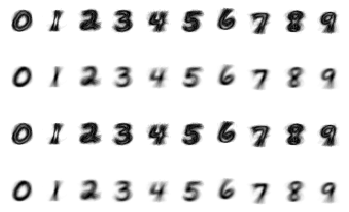

In [11]:
def P9():

### STUDENT END ###
  
  ####Train on GaussianNB with no var_smoothing####
  model_p9_pt0 = GaussianNB()
  model_p9_pt0.fit(mini_train_data,mini_train_labels)

  sigmas = model_p9_pt0.sigma_
  thetas = model_p9_pt0.theta_
  
  fig = plt.figure() #initializing plot
  
  count = 1
  
  ###Plot images of sigma_ and theta_###
  
  for i in sigmas:
    plottable_image = np.reshape(i, (28, 28)) #reshape number
    ax = fig.add_subplot(4, 10, count) #add to 10*num_example matrix
    ax.set_axis_off() #turn axis off
    count = count + 1 #add 1 to the count

    ax.imshow(plottable_image, cmap='gray_r') #imshow for number in question
    
  for i in thetas:
    plottable_image = np.reshape(i, (28, 28)) #reshape number
    ax = fig.add_subplot(4, 10, count) #add to 10*num_example matrix
    ax.set_axis_off() #turn axis off

    ax.imshow(plottable_image, cmap='gray_r') #imshow for number in question
    count = count + 1 #add 1 to the count

  ## predict on dev data
  
  pred_p9_pt0 = model_p9_pt0.predict(dev_data)
  accuracy_count_p9_pt0 = 0
  
  
  ###generate accuracy
  for j in range(dev_labels.shape[0]):
    if pred_p9_pt0[j] == dev_labels[j]:
      accuracy_count_p9_pt0 += 1
    else:
      continue

  print("GaussianNB accuracy w/ no modification: " + str(accuracy_count_p9_pt0/pred_p9_pt0.shape[0]))

  ###Train on gaussianNB with var_smoothing = .1###

  model_p9_pt1 = GaussianNB(var_smoothing=.1)
  model_p9_pt1.fit(mini_train_data,mini_train_labels)
  
  sigmas2 = model_p9_pt1.sigma_
  thetas2 = model_p9_pt1.theta_
  
  
  ###Plot images of sigma_ and theta_ for gaussianNB with smoothing###
  
  for i in sigmas2:
    plottable_image = np.reshape(i, (28, 28)) #reshape number
    ax = fig.add_subplot(4, 10, count) #add to 10*num_example matrix
    ax.set_axis_off() #turn axis off
    count = count + 1 #add 1 to the count

    ax.imshow(plottable_image, cmap='gray_r') #imshow for number in question
  

  for i in thetas2:
    plottable_image = np.reshape(i, (28, 28)) #reshape number
    ax = fig.add_subplot(4, 10, count) #add to 10*num_example matrix
    ax.set_axis_off() #turn axis off
    ax.imshow(plottable_image, cmap='gray_r') #imshow for number in question
    count = count + 1 #add 1 to the count
  
  ## predict on dev data

  pred_p9_pt1 = model_p9_pt1.predict(dev_data)
  accuracy_count_p9_pt1 = 0
  
  
  ###generate accuracy
  for j in range(dev_labels.shape[0]):
    if pred_p9_pt1[j] == dev_labels[j]:
      accuracy_count_p9_pt1 += 1
    else:
      continue

  print("GaussianNB accuracy w/ var smoothing @ .1: " + str(accuracy_count_p9_pt1/pred_p9_pt1.shape[0]))
  
  #train on bernoulliNB

  model_p9_pt2 = BernoulliNB()
  model_p9_pt2.fit(mini_train_data,mini_train_labels)

  pred_p9_pt2 = model_p9_pt2.predict(dev_data)
  accuracy_count_p9_pt2 = 0

  for j in range(dev_labels.shape[0]):
    if pred_p9_pt2[j] == dev_labels[j]:
      accuracy_count_p9_pt2 += 1
    else:
      continue

  print("Bernoulli NB performance: " + str(accuracy_count_p9_pt2/pred_p9_pt2.shape[0]))


### STUDENT END ###

gnb = P9()

ANSWER: There are 2 available parameters that can be modified for GaussianNB, priors and var_smoothing. Without modifying any parameters for GaussianNB, the accuracy of the model is .593. After some experimentation, it appears that modifying the var_smoothing parameter, and setting it to .1 yields the best results (predicted accuracy of .817).

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

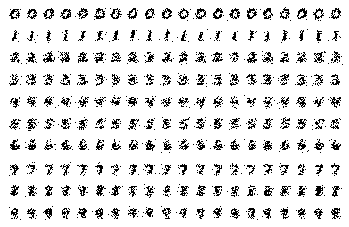

In [12]:
def P10(num_examples):

### STUDENT START ###

  model = BernoulliNB() #initialize model
  model.fit(mini_train_data,mini_train_labels) #train on minitrain

  count = 1
  fig = plt.figure() #initializing plot
  for i in range(10):
    #print(i)

    #get the log probabilities for number in question
    log_prob_i = np.exp(model.feature_log_prob_)[i]

    #generate 20 random images
    for j in range(num_examples):
      random_dist_array = np.random.rand(784) #generate 784 length matrix with probabilities from uniform distribution
      d = np.zeros((784)) #new array which will contain our new image

      new_array = []
    
      for i,v in enumerate(log_prob_i):
        if log_prob_i[i] < random_dist_array[i]: #determine pixel values if probability is less than value of random probability selected from uniform distribution
          d[i] = 0
        else:
          d[i] = 1

      d = d.reshape(28,28) #reshape to 28x28 matrix

      ax = fig.add_subplot(10, num_examples, count) #add to 10x20 matrix

      ax.set_axis_off() #turn axis off

      ax.imshow(d, cmap='gray_r') #imshow for number in question
      count += 1 #iterate to next position in grid

### STUDENT END ###

P10(20)

ANSWER: The generated digits look much blurrier than the training digits.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [13]:
def P11(buckets, correct, total):
    
### STUDENT START ###
  
  max_probabilities = np.array([])
  
  
  #train model using reasonable alpha value
  model_p11 = BernoulliNB(alpha = .001, binarize = .5)
  #fit model using mini train data
  model_p11.fit(mini_train_data,mini_train_labels)
  

  probabilities = model_p11.predict_proba(dev_data)
  #print(probabilities.shape)
  
  #get max posterior probability for each digit in dev_data
  for i,v in enumerate(probabilities):
    max_probabilities = np.append(max_probabilities, np.max(probabilities[i]))

  #print(max_probabilities[21])
  #print(np.max(probabilities[0]))
  
  pred = model_p11.predict(dev_data) #train model
  
  #print(pred[0])
  
  #loop through max_probabilities array and determine counts for each bucket
  for index, p in np.ndenumerate(max_probabilities): #enumerate through our array of max posterior probabilities
    for index2, b in enumerate(buckets):
      if p <= b: #if max probabliity is less than or equal to value of probability bucket, add to bucket
        total[index2] = total[index2] + 1 #add to "total" for this bucket
        
        if pred[index] == dev_labels[index]: #does our predicted value match the label for this bucket?
          correct[index2] = correct[index2] + 1 #if so, add to "correct" for this bucket
        
        break #break out of inner loop and continue to next item in max probabilities
        
    
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]


P11(buckets, correct, total)
#print(correct)
#print(total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))
    
    


p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  36    accuracy = 0.389
p(pred) <= 0.9990000000000    total =  90    accuracy = 0.444
p(pred) <= 0.9999900000000    total =  69    accuracy = 0.565
p(pred) <= 0.9999999000000    total =  67    accuracy = 0.672
p(pred) <= 0.9999999990000    total =  50    accuracy = 0.820
p(pred) <= 0.9999999999900    total =  72    accuracy = 0.903
p(pred) <= 0.9999999999999    total =  66    accuracy = 0.894
p(pred) <= 1.0000000000000    total = 550    accuracy = 0.955


ANSWER: While generally speaking, a higher posterior probability will result in higher accuracy, this is not always the case. For instance, the bucket "0.9999999999900" has an accuracy of .903. However, the next bucket, "0.9999999999999", has an accuracy of .894. That being said, there still appears to be a general trend of increasing accuracy as the posterior increases. We can't always infer the accuracy from the posterior. As a result, I would characterize this classifier as weakly calibrated.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [14]:
def P12():

### STUDENT START ###

  ####Part 1#####
  #We will be taking the average of each column/row for each image and return 
  #the average for each value. Using this method, we should get 56 additional features
  
  
  def image_transformer(input_np_array):
    input_image = np.reshape(input_np_array,(28,28))
    #print(mini_train_slice)

    #initialize new array
    d = np.zeros((56))
    #print(d)  
    count = 0

    #get sum of each row and write to new array iteratively
    for i in input_image:
      d[count] = np.sum(i) 
      count += 1


    #get sum of each column and write to new array iteratively
    for i in range(28):
      
      col_sum = 0 #set column value to 0 for each column we begin to iterate through
      for row in input_image:
        col_sum = col_sum + row[i] #add value at ith column for each row
      d[count] = col_sum
      count += 1
      #print(col_sum)
      #print(count)
      
    #divide each item in array by 28 to return average
    for i in range(len(d)):
      d[i] = d[i]/28

    d = np.concatenate([input_np_array, d]) #add our additional 56 features to the new array
    return d
  
  #creating a copy of mini_train_data to transform
  mini_train_data_p12_pt1 = np.copy(mini_train_data)
  
  #transform training data
  for i, v in enumerate(mini_train_data_p12_pt1):
    if i == 0:
      mini_train_data_transform_pt1 = image_transformer(v) #If it is the first value, initialize the array
    else:
      mini_train_data_transform_pt1 = np.vstack((mini_train_data_transform_pt1, image_transformer(v))) #stack following values

  #creating a copy of dev_data to transform         
  dev_data_p12_pt1 = np.copy(dev_data)   
  
  #transform dev_data
  for i, v in enumerate(dev_data_p12_pt1):
    if i == 0:
      dev_data_transform_pt1 = image_transformer(v) #If it is the first value, initialize the array
    else:
      dev_data_transform_pt1 = np.vstack((dev_data_transform_pt1, image_transformer(v))) #stack following values
        

  #initialize model
  model_p12_pt1 = BernoulliNB(binarize = .5)

  model_p12_pt1.fit(mini_train_data_transform_pt1,mini_train_labels)
  
  pred_p12_pt1 = model_p12_pt1.predict(dev_data_transform_pt1)

  #print(pred_p9)
  accuracy_count_p12_pt1 = 0

  for j in range(dev_labels.shape[0]):
    if pred_p12_pt1[j] == dev_labels[j]:
      accuracy_count_p12_pt1 += 1
    else:
      continue
  
  print("#12 accuracy with additional added features (averaging the values of each row/column for 56 additional features): " + str(accuracy_count_p12_pt1/pred_p12_pt1.shape[0]))

  
  ####Part 2: Let us try running a blurring function against our training and dev data as well####
  
  #### Blurring function####
  def blurring_function(image_array): #pass in 784 length matrix
    cv_matrix = np.array([[.0625, .125, .0625], [.125, .25, .125] , [.0625 , .125, .0625] ]) #convolution matrix
    #cv_matrix = gkern2(3, 1)
    plottable_image = np.reshape(image_array, (28, 28)) #reshape to 28x28 matrix
    d = np.zeros((28,28)) #new array to write to

    rows = plottable_image.shape[0] #return number of rows of plottable image
    cols = plottable_image.shape[1] #return number of columns of plottable image

    #get surrounding pixels for each pixel in mnist image. 
    #if it is outside of boundaries of our matrix, return 0
    def get_surrounding_pixels(x,y,i):
      if x-1 >= 0 and y-1 >= 0:
        upper_left = i[x-1,y-1]
      else:
        upper_left = 0

      if y-1 >= 0:
        upper_mid = i[x,y-1]
      else:
        upper_mid = 0

      if x-1 >= 0 and y+1 < 28:
        upper_right = i[x-1, y+1]
      else:
        upper_right  = 0

      if x-1 >= 0:
        mid_left = i[x-1,y]
      else:
        mid_left = 0

      mid = i[x,y]

      if x+1 < 28:
        mid_right = i[x+1,y]
      else:
        mid_right = 0

      if x - 1 >= 0 and y+1 < 28: 
        bottom_left = i[x-1,y+1]
      else:
        bottom_left = 0

      if y+1 < 28:
        bottom_mid = i[x,y+1]
      else:
        bottom_mid = 0

      if x+1 < 28 and y+1 < 28:
        bottom_right = i[x+1,y+1]
      else:
        bottom_right = 0

      pixel_array = np.array([[upper_left, upper_mid, upper_right], [mid_left, mid, mid_right] , [bottom_left, bottom_mid, bottom_right] ])
      #print(x,y)
      #print(pixel_array)
      return pixel_array


    #determine new pixel value based on weights of our convolution matrix
    #and set position on new matrix
    def setBlurredPixel(pixel_array,convolution_matrix):
      new_blurred_value = (pixel_array[0,0] * convolution_matrix[0,0] 
                           + pixel_array[1,0]  * convolution_matrix[1,0] 
                           + pixel_array[2,0]  * convolution_matrix[2,0] 
                           + pixel_array[0,1]  * convolution_matrix[0,1] 
                           + pixel_array[1,1]  * convolution_matrix[1,1]   
                           + pixel_array[2,1] * convolution_matrix[2,1]    
                           + pixel_array[0,2] * convolution_matrix[0,2] 
                           + pixel_array[1,2] * convolution_matrix[1,2]   
                           + pixel_array[2,2] * convolution_matrix[2,2]    
                          ) 
      return new_blurred_value

    #return blurred pixel value  

    def setNewValue(newPixelValue,newArray,x,y):
      newArray[x,y] = newPixelValue

    #print(plottable_image)

    #Loop through each pixel and set blurred value to matrix d
    for x in range(0, rows):
      for y in range(0, cols):
        setNewValue(setBlurredPixel(get_surrounding_pixels(x,y,plottable_image),cv_matrix), d, x, y)

    blurred_output = np.reshape(d,(1,784)) #Reshape blurred image back to 784 matrix

    return blurred_output #return the blurred array
  

  #creating a copy of mini_train_data to transform
  mini_train_data_p12_pt2 = np.copy(mini_train_data)
  
  #transform training data
  for i, v in enumerate(mini_train_data_p12_pt2):
    if i == 0:
      mini_train_data_transform_pt2 = blurring_function(v) #If it is the first value, initialize the array
    else:
      mini_train_data_transform_pt2 = np.vstack((mini_train_data_transform_pt2, blurring_function(v))) #stack following values

  #creating a copy of dev_data to transform         
  dev_data_p12_pt2 = np.copy(dev_data)   
  
  #transform dev_data
  for i, v in enumerate(dev_data_p12_pt2):
    if i == 0:
      dev_data_transform_pt2 = blurring_function(v) #If it is the first value, initialize the array
    else:
      dev_data_transform_pt2 = np.vstack((dev_data_transform_pt2, blurring_function(v))) #stack following values
        

  #initialize model
  model_p12_pt2 = BernoulliNB(binarize = .5)

  model_p12_pt2.fit(mini_train_data_transform_pt2,mini_train_labels)
  
  pred_p12_pt2 = model_p12_pt2.predict(dev_data_transform_pt2)

  #print(pred_p9)
  accuracy_count_p12_pt2 = 0

  for j in range(dev_labels.shape[0]):
    if pred_p12_pt2[j] == dev_labels[j]:
      accuracy_count_p12_pt2 += 1
    else:
      continue
  
  print("#12 accuracy with additional added features (apply blurring function then run Naive Bayes): " + str(accuracy_count_p12_pt2/pred_p12_pt2.shape[0]))
  
  
  
### STUDENT END ###

P12()

#12 accuracy with additional added features (averaging the values of each row/column for 56 additional features): 0.817
#12 accuracy with additional added features (apply blurring function then run Naive Bayes): 0.813
